# Robert Roche

## CS 383 HW 2

## imports

In [3]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from math import ceil
from math import *
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import random

## Part 2: Logistic Regression

My thetas: [ 2.13984715  3.77597723 -2.57172315]
SKlearn Thetas [ 23.65086457  71.20787484 -33.85885804]
My slope: 1.468267385071841
SKlearn Slope: 2.1030796359587702
My intercept: 0.8320674585166086
SKlearn Intercept: 0.6985133564322311


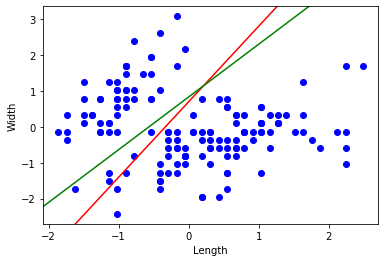

In [4]:
#helped me read in the data properly
#https://stackoverflow.com/questions/19143667/how-to-read-a-csv-without-the-first-column
from sklearn.datasets import load_iris

#sigmoid
def g(x):  
    return (1/(1+np.exp(-x)))

#calculate the loss of data as the sum described in lecture
def loss(x,y,theta):
    return np.sum(-y * np.log(g(x@theta)) - (1 - y) * np.log(1 - (g(x@theta))))
    
    
iris = load_iris()

x = iris.data[:,:2]
y = (iris.target!= 0) * 1

x = np.array(x)
y = np.array(y)

#calculate the mean and standard deviation
mean = np.mean(x,axis=0)
std=np.std(x,axis=0,ddof=1)

x = (x-mean)/std

plt.plot(x[:,0],x[:,1],"bo")

# Add Bias to the data
x = np.insert(x, 0, values=1, axis=1)

#learning parameter
n=0.01
N=len(x)
#loss and previous loss
l = 5000
p_loss =1
#set iterations to 0
iteration = 0

#randomly choose values between -1 to 1 for the initial thetas
thetas = [random.randint(-1,1),random.randint(-1,1),random.randint(-1,1)]

#while loop
while 1:
    thetas = np.subtract(thetas,(((n/N)*x.T)@(np.subtract(g(x@thetas),y))))

    prev_loss = l
    l = loss(x,y,thetas)
   
    if(np.abs((l-p_loss))<(2**(-23)) or (iteration>10000)):
        break
    iteration+=1

###################################################
#           Plotting my results vs sklearn        #
###################################################

lgr = LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000)
lgr.fit(x,y)
optimal_thetas = lgr.coef_[0]
print("My thetas: " + str(thetas))
print("SKlearn Thetas " + str(optimal_thetas))
my_slope = -(thetas[1])/(thetas[2])
my_int = -(thetas[0])/(thetas[2])
slope = -(optimal_thetas[1]/(optimal_thetas[2]))
intercept = -(optimal_thetas[0] / optimal_thetas[2])
print("My slope: " + str(my_slope) + "\nSKlearn Slope: " + str(slope))
print("My intercept: " + str(my_int) + "\nSKlearn Intercept: " + str(intercept))
ax = plt.gca()
bx = plt.gca()
bx.autoscale(False)
ax.autoscale(False)
my_x = np.array(bx.get_xlim())
my_y = my_int + (my_slope * my_x)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals,y_vals,color="red")
plt.plot(my_x,my_y,color ="green")

plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

## Part 3 Spam Logistic Regression

In [5]:
#sigmoid
def g(x):  
    return (1/(1+np.exp(-x)))

#calculate the loss of data as the sum described in lecture
def loss(x,y,theta):
    return np.sum(-y * np.log(g(x@theta)) - (1 - y) * np.log(1 - (g(x@theta))))

def predict(x,thetas):
    y = g(x@thetas)
    rounded = []
    for i in y: 
        if i>=0.5:
            rounded.append(1)
        else:
            rounded.append(0)
    return rounded
        

f = open("spambase.data")
length = len(f.readline().split(','))
data=np.loadtxt("spambase.data", delimiter=",")
data = np.array(data)
np.random.seed(0)
np.random.shuffle(data)
#slice data into x and y columns
y = data[:, 57]
x = data[:,0:57]
x = np.array(x)
y = np.array(y)

#split the data into 2/3 trainging 1/3 testing
xtrn,xtst,ytrn,ytst = train_test_split(x,y,test_size = (1/3),random_state=0)


mean = np.mean(xtrn,axis=0)
std=np.std(xtrn,axis=0,ddof=1)

#sxtrn is the standardized trainging set
sxtrn = (xtrn-mean)/std
sxtst = (xtst-mean)/std
sxtrn = np.insert(sxtrn, 0, values = 1, axis = 1)
sxtst = np.insert(sxtst, 0, values = 1, axis = 1)

#learning parameter
n=0.01
N=len(sxtrn)
#loss and previous loss
l = 5000
p_loss =1
#set iterations to 0
iteration = 0
thetas = []
#randomly choose values between -1 to 1 for the initial thetas
for i in range(len(sxtrn[0])):
    thetas.append(random.randint(-1,1))
#while loop
while 1:
    thetas = np.subtract(thetas,(((n/N)*sxtrn.T)@(np.subtract(g(sxtrn@thetas),ytrn))))
    prev_loss = l
    l = loss(sxtrn,ytrn,thetas)
   
    if(np.abs((l-p_loss))<(2**(-23)) or (iteration>1500)):
        break
    iteration+=1
    
print("Thetas: " + str(thetas))
y_pred = predict(sxtst,thetas)
y_actual = ytst

accuracy = float(sum(y_pred == y_actual))/ float(len(y_actual))
print("\n\nAccuracy " + str(accuracy))

TP=0
FP=0
TN=0
FN=0
i=0

#compair the predicted values to the true values and record True/False Positives and Negatives
while i < len(y_pred):   
    if y_pred[i] == 1 and  y_actual[i]==1:
        TP+=1
    elif y_pred[i] == 1 and  y_actual[i] ==0:
        FP+=1        
    elif y_pred[i] == 0 and  y_actual[i] ==0:
        TN+=1    
    elif y_pred[i] == 0 and  y_actual[i] ==1:
        FN+=1
    i+=1
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f_measure = (2*precision*recall)/(precision+recall)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("f-measure: " + str(f_measure))



        
    



C:\Users\roche\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\roche\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


Thetas: [-0.90995644 -0.49146217  0.24979301  0.50660085  0.13270132  0.41196222
  0.29575423  0.60927798  0.3750385  -0.15310848  0.37570044 -0.20421246
  0.38335293  0.43907139  0.14812503  0.96092598  1.24111806  1.04750057
  0.66724442  0.66011359 -0.1803951   0.07401371  1.02894274  1.18208144
  0.47082304  0.16703547 -1.29173446 -0.25279203 -0.11979397 -1.17930072
  0.31096446  0.45438233 -0.335551   -1.01160536  0.6651728  -1.22843883
 -1.06751901  0.26485296  0.52540075  0.13147065  0.59924351 -0.24881718
 -1.19462439 -1.03438847 -0.19510387 -0.04961366  0.03984216 -0.90180132
 -1.00216528 -1.07005138  0.39664712  0.4719225   0.33455311  1.31763878
  0.81996575  0.02543457  1.1998819   0.42820009]


Accuracy 0.8572359843546284
Precision: 0.8405017921146953
Recall: 0.7829716193656093
f-measure: 0.8107173725151253


## Part 4 Naive Bayes

In [2]:
from scipy.stats import norm

def product(x):
    prod = 1
    for i in x:
        prod = prod*i
    return prod
        
        
f = open("spambase.data")
length = len(f.readline().split(','))
data=np.loadtxt("spambase.data", delimiter=",")
data = np.array(data)
np.random.seed(0)
np.random.shuffle(data)
#slice data into x and y columns
y = data[:, 57]
x = data[:,0:57]
x = np.array(x)
y = np.array(y)

spam = []
non_spam = []

#split the data into 2/3 trainging 1/3 testing
xtrn,xtst,ytrn,ytst = train_test_split(x,y,test_size = (1/3),random_state=0)


mean = np.mean(xtrn,axis=0)
std=np.std(xtrn,axis=0,ddof=1)

#standardize our sets
sxtrn = (xtrn-mean)/std
sxtst = (xtst-mean)/std

i=0
#breaking the testing data into spam/not spam
while i < len(sxtrn):
    if ytrn[i] == 1:
        spam.append(sxtrn[i])
    elif ytrn[i] == 0:
        non_spam.append(sxtrn[i])
    else:
        print("Error, not binary")
        break
    i+=1

    #calculating priors
prior_spam = len(spam)/len(sxtrn)
prior_non_spam = len(non_spam)/len(sxtrn)

mean_s = np.mean(spam,axis=0)
mean_ns = np.mean(non_spam, axis = 0)

std_s = np.std(spam,axis=0,ddof=1)
std_ns = np.std(non_spam, axis =0,ddof=1)

#get the normal models
spam_model = norm.pdf(sxtst,mean_s,std_s)
non_spam_model = norm.pdf(sxtst,mean_ns,std_ns)

#account for 0's with a tiny positive value
for i in spam_model:
    for j in i:
        if j == 0:
            j += 0.001
for i in non_spam_model:
    for j in i:
        if j == 0:
            j += 0.001

#calculate spam probabilities
prob_spam = []
prob_nspam = []

for l in spam_model:
    prob_spam.append(product(l) * prior_spam)
    
for l in non_spam_model:
    prob_nspam.append(product(l) * prior_non_spam)
    
y_pred = []

i = 0
#classify the test data based on max probabilities
while i < len(prob_spam):
    if prob_spam[i]>prob_nspam[i]:
        y_pred.append(1)
    else:
        y_pred.append(0)
    i+=1

y_actual = ytst

#evaluate results 
s = 0
i=0
while i < len(y_pred):
    if(y_pred[i] == y_actual[i]):
        s+=1
    i+=1
accuracy = float(s)/ float(len(y_actual))
print("\n\nAccuracy " + str(accuracy))

TP=0
FP=0
TN=0
FN=0
i=0

#compair the predicted values to the true values and record True/False Positives and Negatives
while i < len(y_pred):   
    if y_pred[i] == 1 and  y_actual[i]==1:
        TP+=1
    elif y_pred[i] == 1 and  y_actual[i] ==0:
        FP+=1        
    elif y_pred[i] == 0 and  y_actual[i] ==0:
        TN+=1    
    elif y_pred[i] == 0 and  y_actual[i] ==1:
        FN+=1
    i+=1
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f_measure = (2*precision*recall)/(precision+recall)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("f-measure: " + str(f_measure))


NameError: name 'np' is not defined